In [28]:
from dont_patronize_me import DontPatronizeMe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dpm = DontPatronizeMe('.', '.')

In [30]:
dpm.load_task1()

In [31]:
trids = pd.read_csv('data/train_semeval_parids-labels.csv')
teids = pd.read_csv('data/dev_semeval_parids-labels.csv')

In [32]:
trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)

In [33]:
data=dpm.train_task1_df

In [34]:
data

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4


21


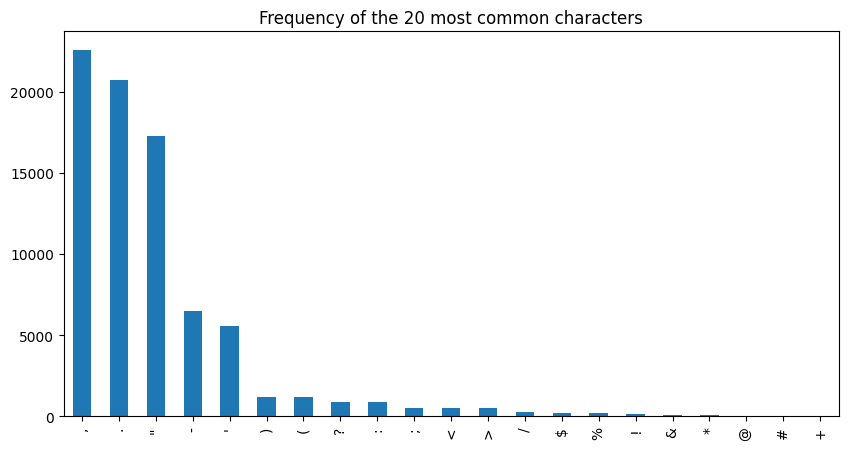

In [35]:
# We count how frequently each character appears in the dataset
char_freq = data['text'].apply(lambda x: pd.Series(list(x)).value_counts()).sum(axis=0)
char_freq = char_freq.sort_values(ascending=False)

# Remove letters, spaces and digits
char_freq = char_freq[~char_freq.index.str.isalnum()]
char_freq = char_freq[~char_freq.index.str.isspace()]

print(len(char_freq))

# We plot the frequency
plt.figure(figsize=(10, 5))
char_freq.plot(kind='bar')
plt.title('Frequency of the 20 most common characters')
plt.show()

In [36]:
# We obtain the characters
chars = char_freq.index
' '.join(chars)

', . " - \' ) ( ? : ; < > / $ % ! & * @ # +'

In [37]:
# Find sample texts that use each of the characters
samples = {}
already_seen_texts = []
for c in chars:
    found = False
    for i in data['text'].tolist():
        if c in i and i not in already_seen_texts:
            found = True
            samples[c] = i
            already_seen_texts.append(i)
            break
    if not found:
        samples[c] = 'No text with this character'

samples

{',': "We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism .",
 '.': "In Libya today , there are countless number of Ghanaian and Nigerian immigrants . These are the two countries with key macroeconomic challenges including unemployment . Let 's tackle this issue from the root and not the fruit . Thank you",
 '"': '"White House press secretary Sean Spicer said that the focus of immigration actions would be illegal immigrants "" w

# Data analysis

**Ratio of label=1 samples per country**

Text(0.5, 1.0, 'Ratio of label=1 samples per country')

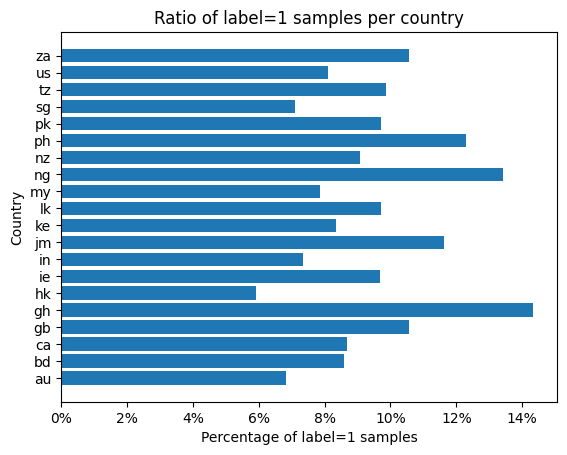

In [38]:
countries = data['country'].value_counts()
countries

# number of label=1 samples per country
countries1 = data[data['label']==1]['country'].value_counts()

# ratio of label=1 samples per country
countries1_ratio = countries1/countries

# plot the ratio
fig, ax = plt.subplots()
ax.barh(countries1_ratio.index, countries1_ratio)
# set the x-axis to percentage
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.set_xlabel('Percentage of label=1 samples')
ax.set_ylabel('Country')
ax.set_title('Ratio of label=1 samples per country')

**Ration of label=1 samples per keyword**

C:\Users\alber\AppData\Local\Temp\ipykernel_6104\2506129731.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


Text(0.5, 1.0, 'Ratio of label=1 samples per country')

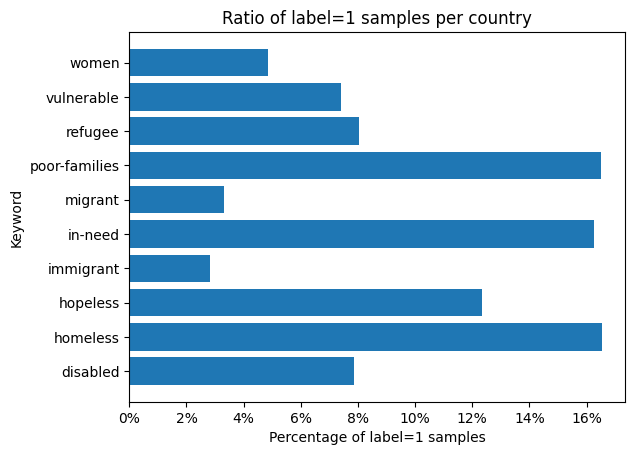

In [39]:
keywords = data['keyword'].value_counts()

# number of label=1 samples per country
keywords1 = data[data['label']==1]['keyword'].value_counts()
# ratio of label=1 samples per country
keywords1_ratio = keywords1/keywords
# plot horizontal bars
fig, ax = plt.subplots()
ax.barh(keywords1_ratio.index, keywords1_ratio)
# set the x-axis to percentage
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.set_xlabel('Percentage of label=1 samples')
ax.set_ylabel('Keyword')

ax.set_title('Ratio of label=1 samples per country')

**Average sentence length per country**

<BarContainer object of 20 artists>

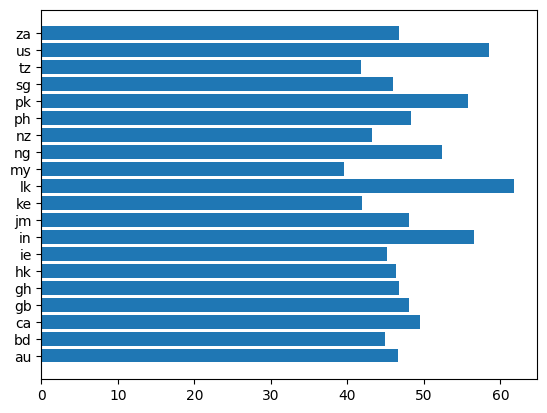

In [40]:
# average sentence length per country
data['sentence_length'] = data['text'].apply(lambda x: len(x.split()))
sentence_length_country = data.groupby('country')['sentence_length'].mean()
plt.barh(sentence_length_country.index, sentence_length_country)

<BarContainer object of 10 artists>

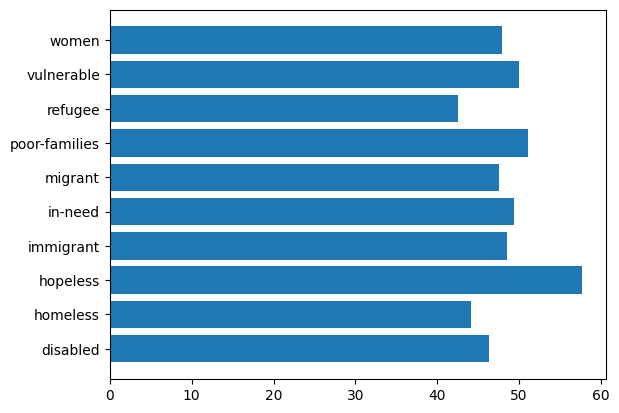

In [41]:
# average sentence length per keyword
sentence_length_keyword = data.groupby('keyword')['sentence_length'].mean()
plt.barh(sentence_length_keyword.index, sentence_length_keyword)

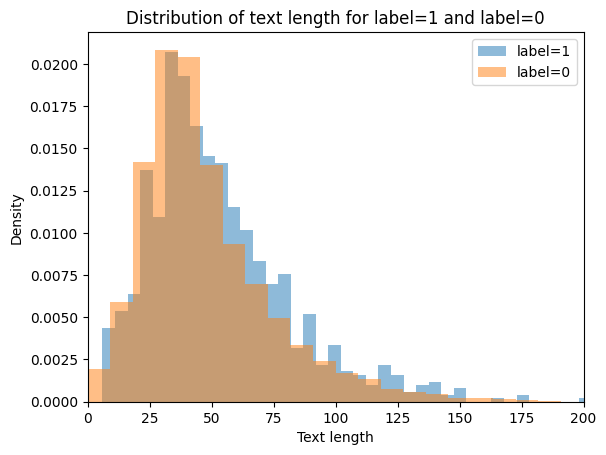

In [42]:
# get the distribution of length of the text for label=1 and label=0
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

bins = 100

# plot normalised histogram of text length for label=1 and label=0
fig, ax = plt.subplots()
ax.hist(data[data['label']==1]['text_length'], bins=bins, alpha=0.5, label='label=1', density=True)
ax.hist(data[data['label']==0]['text_length'], bins=bins, alpha=0.5, label='label=0', density=True)
ax.set_xlabel('Text length')
ax.set_ylabel('Density')
# set x limits
ax.set_xlim(0, 200)
ax.set_title('Distribution of text length for label=1 and label=0')
ax.legend()


Tokenization max length

In [43]:
# We import deberta tokenizer
from transformers import DebertaTokenizer

# We load the tokenizer
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')

# We tokenize the text
tokens = tokenizer(data['text'].tolist(), padding=True, truncation=False, return_tensors='pt')

Token indices sequence length is longer than the specified maximum sequence length for this model (546 > 512). Running this sequence through the model will result in indexing errors


In [44]:
text_tokens = tokens['input_ids']
token_lengths = np.zeros(text_tokens.shape[0])
for i in range(text_tokens.shape[0]):
    token_lengths[i] = np.count_nonzero(text_tokens[i].numpy())

In [45]:
indices_exceeding_512 = np.where(token_lengths > 512)
print('Number of texts with more than 512 tokens:', len(indices_exceeding_512[0]))

Number of texts with more than 512 tokens: 2


In [46]:
print('Texts with more than 512 tokens:')
for index in indices_exceeding_512[0]:
    print('Text ' + str(index) + ' with length: ' + str(int(token_lengths[index])) + ': ' + data['text'][index])

Texts with more than 512 tokens:
Text 6832 with length: 546: "Most are from desperately poor Horn of Africa countries and like tens of thousands each year , were willing to risk the treacherous journey through war-torn and impoverished Yemen in the hope of finding work in Saudi Arabia and other wealthy Gulf Arab states . But their plan was not to be . Caught and detained by the Yemeni authorities , the 600 or so men now await deportation , prevented from leaving their makeshift jail by armed soldiers . Conditions at the warehouse are growing increasingly desperate . Several days ago , the authorities stopped handing out food and basic supplies . "" I came from Djibouti to work . They used to give us small amounts of food . If there is no food , we will die , "" said one migrant who declined to give his name . "" If there is no solution , they will deport us to our countries or get us out of here "" , the man added . Yemen , the poorest country on the Arabian Peninsula , has long been a

In [47]:
n = [32, 64, 96, 128, 192, 256, 384, 512]
for n in n:
    print('Texts with more than %d tokens: %d (%.3f%%)' % (n, len(np.where(token_lengths > n)[0]), len(np.where(token_lengths > n)[0])/len(token_lengths)*100))

Texts with more than 32 tokens: 8361 (79.864%)
Texts with more than 64 tokens: 2960 (28.274%)
Texts with more than 96 tokens: 966 (9.227%)
Texts with more than 128 tokens: 324 (3.095%)
Texts with more than 192 tokens: 27 (0.258%)
Texts with more than 256 tokens: 8 (0.076%)
Texts with more than 384 tokens: 4 (0.038%)
Texts with more than 512 tokens: 2 (0.019%)


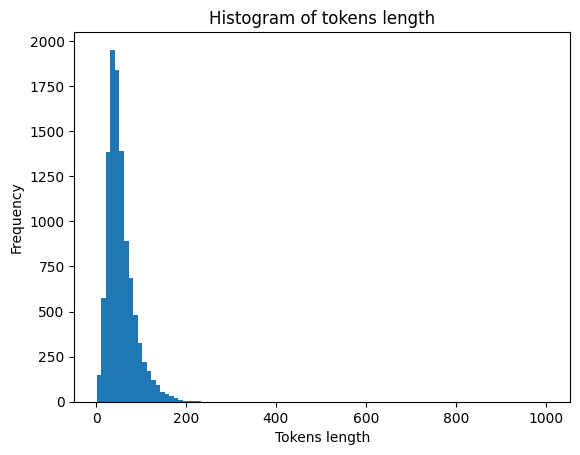

In [48]:
# We plot the histogram of the length of the tokens
fig, ax = plt.subplots()
ax.hist(token_lengths, bins=100)
ax.set_xlabel('Tokens length')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of tokens length')
plt.show()

# Data split analysis

In [49]:
from sklearn.model_selection import train_test_split

def load_data(train_size=0.8, random_state=42):
    dpm = DontPatronizeMe('.', '.')
    dpm.load_task1()
    trids = pd.read_csv('data/train_semeval_parids-labels.csv')
    teids = pd.read_csv('data/dev_semeval_parids-labels.csv')
    trids.par_id = trids.par_id.astype(str)
    teids.par_id = teids.par_id.astype(str)
    data = dpm.train_task1_df

    rows_train_val = [] # will contain par_id, label and text
    for idx in range(len(trids)):
        parid = trids.par_id[idx]
        # select row from original dataset to retrieve `text` and binary label
        instance = data.loc[data.par_id == parid]
        keyword = instance.keyword.values[0]
        text = instance.text.values[0]
        label = instance.label.values[0]
        rows_train_val.append({
            'par_id':parid,
            'community':keyword,
            'text':text,
            'label':label
        })

    rows_train, rows_val = train_test_split(rows_train_val, train_size=train_size, random_state=random_state)

    rows_test = [] # will contain par_id, label and text
    for idx in range(len(teids)):
        parid = teids.par_id[idx]
        #print(parid)
        # select row from original dataset
        instance = data.loc[data.par_id == parid]
        keyword = instance.keyword.values[0]
        text = instance.text.values[0]
        label = instance.label.values[0]
        rows_test.append({
            'par_id':parid,
            'community':keyword,
            'text':text,
            'label':label
        })
    print(len(rows_train), len(rows_val), len(rows_test))

    return pd.DataFrame(rows_train), pd.DataFrame(rows_val), pd.DataFrame(rows_test)

train_dataset_raw, eval_dataset_raw, test_dataset_raw = load_data(train_size=0.8)

6700 1675 2094


In [62]:
# Analyse the distribution of the labels
print('Training set:', train_dataset_raw['label'].value_counts())
print('Validation set:', eval_dataset_raw['label'].value_counts())
print('Test set:', test_dataset_raw['label'].value_counts())

Training set: label
0    6073
1     627
Name: count, dtype: int64
Validation set: label
0    1508
1     167
Name: count, dtype: int64
Test set: label
0    1895
1     199
Name: count, dtype: int64


In [66]:
proportion_test = test_dataset_raw['label'].value_counts()[1] / test_dataset_raw['label'].value_counts().sum()

2 * proportion_test / (1 + proportion_test)

0.17357174007849976

In [61]:
from sklearn.metrics import f1_score

# Check the F1 score of the majority class
majority_class = test_dataset_raw['label'].value_counts().idxmax()
print('F1 score of the majority class (%d):' % majority_class, f1_score(test_dataset_raw['label'], [majority_class]*len(test_dataset_raw), average='binary'))

# Check the F1 score of the minority class
minority_class = test_dataset_raw['label'].value_counts().idxmin()
print('F1 score of the minority class (%d):' % minority_class, f1_score(test_dataset_raw['label'], [minority_class]*len(test_dataset_raw), average='binary'))

# Check the F1 score for a random classifier with the same distribution as the training set
np.random.seed(42)
probabilities = train_dataset_raw['label'].value_counts(normalize=True).sort_index().values
predictions = np.random.choice([0, 1], len(test_dataset_raw), p=probabilities)
print('F1 score of a weighted', probabilities, 'classifier:', f1_score(test_dataset_raw['label'], predictions, average='binary'))

# Check the F1 score for a random classifier with equal probabilities
np.random.seed(42)
probabilities = [0.5, 0.5]
predictions = np.random.choice([0, 1], len(test_dataset_raw), p=probabilities)
print('F1 score of a random classifier:', f1_score(test_dataset_raw['label'], predictions, average='binary'))

F1 score of the majority class (0): 0.0
F1 score of the minority class (1): 0.17357174007849976
F1 score of a weighted [0.90641791 0.09358209] classifier: 0.09137055837563451
F1 score of a random classifier: 0.15433571996817821
